# Mosaic MRO/HiRISE images

In [1]:
from pathlib import Path

path_archive = Path('./data/MRO/HIRISE/Reduced/')

In [2]:
list(path_archive.glob('*'))

[PosixPath('data/MRO/HIRISE/Reduced/ESP_023817_1800_RED.tif'),
 PosixPath('data/MRO/HIRISE/Reduced/ESP_041909_1800_RED.tif'),
 PosixPath('data/MRO/HIRISE/Reduced/PSP_007361_1800_RED.tif')]

In [3]:
files_tif = [ p.as_posix() for p in path_archive.glob('*.tif') ]
files_tif

['data/MRO/HIRISE/Reduced/ESP_023817_1800_RED.tif',
 'data/MRO/HIRISE/Reduced/ESP_041909_1800_RED.tif',
 'data/MRO/HIRISE/Reduced/PSP_007361_1800_RED.tif']

In [4]:
output = "output.tif"

In [5]:
# from osgeo import gdal

# g = gdal.Warp(output, files_tif, format="GTiff", options=["COMPRESS=LZW", "TILED=YES"])
# g = None

In [6]:
import rasterio
from rasterio.merge import merge

with rasterio.open(files_tif[0]) as src:
    meta = src.meta.copy()

# The merge function returns a single array and the affine transform info
arr, out_trans = merge(files_tif)

meta.update({
    "driver": "GTiff",
    "height": arr.shape[1],
    "width": arr.shape[2],
    "transform": out_trans
})

# Write the mosaic raster to disk
with rasterio.open(output, "w", **meta) as dest:
    dest.write(arr)

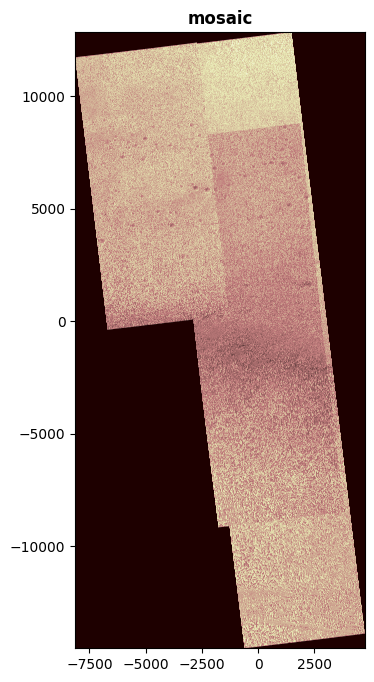

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show

fig, ax = plt.subplots(1,1, figsize=(12,8))

with rasterio.open(output) as img:
    show((img,1), ax=ax, cmap='pink', title='mosaic')